### Deep Diving into Regularization-Selected Features

We are exploring the results that we got from regularization in Exp4 and trying to find a country with similar food insecurity indices values at the start of the century to then further compare how those features evolved for both the countries over time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_dataset = pd.read_csv('../data/final_dataset.csv')

In [3]:
# We are replacing the values that are deemed too insignificant to calculate and are
# reported in the dataset in the format: '<X' by their upper bound X.
for l in ["UndernourishedPercent", "ModerateSevereInsecurePeople", "SevereInsecurePercent"]:
    base_dataset[l] = base_dataset[l].str.replace('<', '')

In [4]:
# Trying to see the undernourished data for all countries
undernourished_data = base_dataset[[
    'CountryCode',
    'Country',
    'Year',
    'UndernourishedPercent',
    'Population'
]].sort_values(by=['CountryCode', 'Year']).reset_index(drop=True)

In [5]:
undernourished_data = undernourished_data[undernourished_data['Year']>=2000]
countries = undernourished_data['Country'].unique()
years = undernourished_data['Year'].unique()

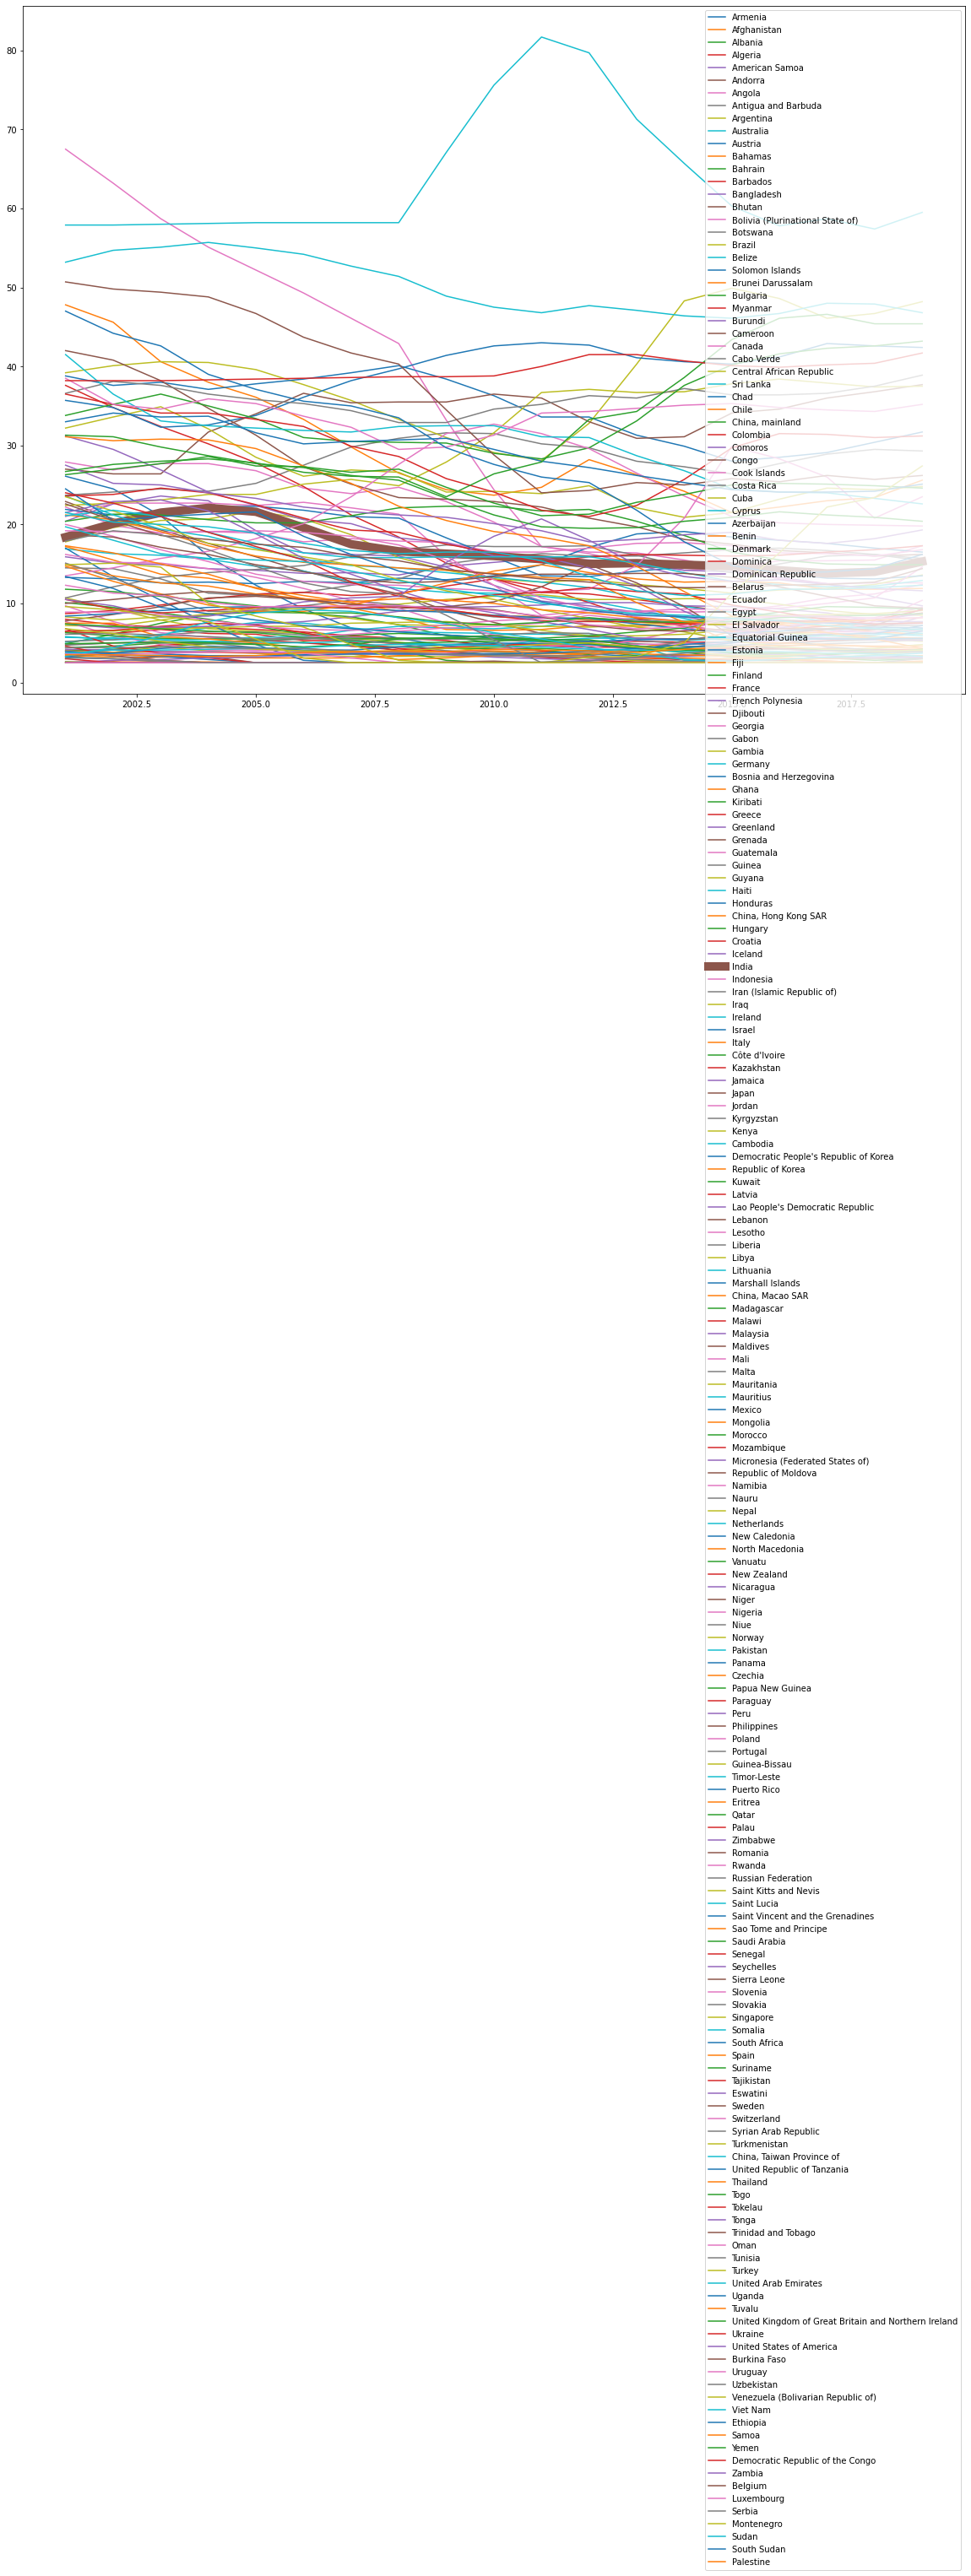

In [6]:
fig = plt.figure(figsize=(20, 15))
for country in countries:
    current_data = undernourished_data[undernourished_data['Country'] == country]
    if country == 'India':
        plt.plot(current_data['Year'], current_data['UndernourishedPercent'], label=country, linewidth=10)
    else:
        plt.plot(current_data['Year'], current_data['UndernourishedPercent'], label=country)
        
plt.legend()
plt.show()

In [7]:
india_starting_value = float(undernourished_data[
    (undernourished_data['Country'] == 'India')
    & (undernourished_data['Year'] == 2001)
]['UndernourishedPercent'].values[0])

In [8]:
start_percent = india_starting_value - 5
end_percent = india_starting_value + 10.0

In [9]:
neighbouring_countries = undernourished_data[
    (undernourished_data['Year'] == 2001)
    & (undernourished_data['UndernourishedPercent'].astype(float).between(start_percent, end_percent))
    & (undernourished_data['Population'] >= 50000)
]['Country'].unique()

In [10]:
neighbouring_countries

array(['Bangladesh', 'India', 'Indonesia', 'Pakistan', 'Philippines',
       'Thailand', 'Viet Nam'], dtype=object)

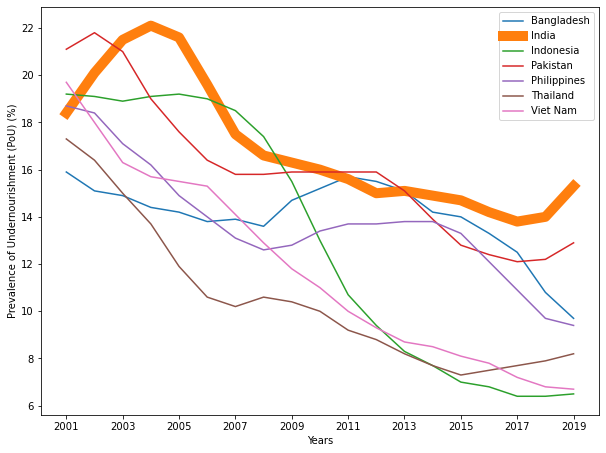

In [11]:
fig = plt.figure(figsize=(10, 7.5))
for country in neighbouring_countries:
    current_data = undernourished_data[undernourished_data['Country'] == country]
    if country == 'India':
        plt.plot(current_data['Year'], current_data['UndernourishedPercent'], label=country, linewidth=10)
    else:
        plt.plot(current_data['Year'], current_data['UndernourishedPercent'], label=country)

plt.xlabel('Years')
plt.xticks(np.arange(2001, 2020, 2))
plt.ylabel('Prevalence of Undernourishment (PoU) (%)')
        
plt.legend()
plt.show()